In [1]:
import numpy as np
from matplotlib import pyplot as plt
import csv
from scipy.misc import imresize

%matplotlib inline

In [2]:
train_data = np.fromfile("trainImages.dmp", dtype=np.uint8)
train_labels = []
with open("trainLabels.txt", "r") as csvfile:
    values = csv.reader(csvfile, delimiter=',')
    for value in values:
        train_labels.append(value[1])
        
train_labels = train_labels[1:]

In [3]:
def parse_image_data(train_data):
    i = 0
    images = []
    while i < len(train_data):
        width = train_data[i]
        i += 1
        height = train_data[i]
        i += 1
        size = int(width) * height
        image = train_data[i:i + size]
        i += size
        images.append(image.reshape(width, height))
    return images

In [4]:
train_data = parse_image_data(train_data)

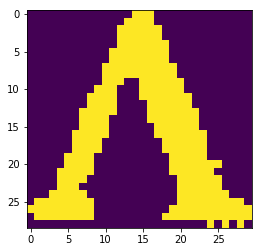

Greek_Lambda


In [5]:
index = 1234
plt.imshow(train_data[index])
plt.show()
print(train_labels[index])

In [6]:
test_data = np.fromfile("testImages.dmp", dtype=np.uint8)
test_data = parse_image_data(test_data)

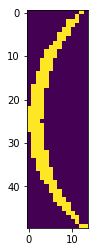

In [7]:
index = 100
plt.imshow(test_data[index])
plt.show()

In [8]:
size = np.mean(list(map(lambda x: x.shape, test_data)), axis=0)
size /= 2
size = size.astype(int)

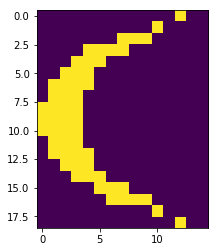

In [9]:
plt.imshow(imresize(test_data[index], size))
plt.show()

In [10]:
train_data_resized = list(map(lambda image: np.ravel(imresize(image, size)), train_data))
test_data_resized = list(map(lambda image: np.ravel(imresize(image, size)), test_data))


Добавим в качестве признаков отношение сторон исходной картинки и среднее количество светлых пикселей.

In [11]:
for i in range(len(train_data)):
    train_data_resized[i] = np.append(train_data_resized[i], 
        [float(train_data[i].shape[0]) / float(train_data[i].shape[1]), train_data[i].mean()])
                                      
for i in range(len(test_data)):
    test_data_resized[i] = np.append(test_data_resized[i],
        [float(test_data[i].shape[0]) / float(test_data[i].shape[1]), test_data[i].mean()])
    

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
clf = KNeighborsClassifier(n_jobs=-1)
clf.fit(train_data_resized, train_labels)

labels_predicted = clf.predict(test_data_resized)

In [14]:
f = open("testPredictedLabels.txt", "w")
f.write("Id,Category\n")
for i, label in enumerate(labels_predicted):
    f.write(str(i) + "," + label + "\n")
f.close()